In [1]:
import os
from glob import glob

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import median_abs_deviation

from astroquery.mast import Observations
from astropy.io import fits
from ginga.util.zscale import zscale

In [2]:
!mkdir example_csvs

In [3]:
!mv Downloads/e*.csv example_csvs/

In [4]:
!ls example_csvs/

ex1ai-query_results-corrected.csv ex1aiii-query_results-5.csv
ex1aii-query_results.csv          ex2_query_results_jupiter.csv


In [2]:
paths = sorted(glob('example_csvs/*'))

In [3]:
paths

['example_csvs/ex1ai-query_results-corrected.csv',
 'example_csvs/ex1aii-query_results.csv',
 'example_csvs/ex1aiii-query_results-5.csv',
 'example_csvs/ex2_query_results_jupiter.csv']

In [62]:
file = paths[0]

In [63]:
df = pd.read_csv(file)

In [64]:
df

,id,rootname,filter,expstart,targname
0,337032,iegn13p2q,F814W,59219.17578,TUNGSTEN
1,337033,iegn13oqq,F814W,59219.14063,TUNGSTEN
2,337034,iegn13p1q,F814W,59219.17578,TUNGSTEN
3,337037,iegn13ozq,F814W,59219.16797,TUNGSTEN
4,337488,iegn14boq,F814W,59225.14844,TUNGSTEN
...,...,...,...,...,...
258,359044,ielu54btq,F814W,59565.67578,DARK
259,359575,ielu54brq,F814W,59565.66016,DARK
260,345842,iegn26e5q,F814W,59344.57813,TUNGSTEN
261,346129,iegn25ejq,F814W,59337.65234,TUNGSTEN


In [65]:
targname = df['targname']

In [66]:
targname

0      TUNGSTEN
1      TUNGSTEN
2      TUNGSTEN
3      TUNGSTEN
4      TUNGSTEN
         ...   
258        DARK
259        DARK
260    TUNGSTEN
261    TUNGSTEN
262        DARK
Name: targname, Length: 263, dtype: object

In [67]:
targname_unique = np.unique(targname)

In [68]:
targname_unique

array(['BIAS', 'DARK', 'GD153', 'GD71', 'GRW+70D', 'GRW+70D5824',
       'NAME-F8D1', 'P330E', 'TUNGSTEN', 'TYC-4212-455-1'], dtype=object)

In [71]:
targets = ['GD153', 'OMEGACEN', 'NGC-2020', 'JUPITER']
mask = targname == targets[0]

In [72]:
df_mask = df[mask]

In [73]:
df_mask

,id,rootname,filter,expstart,targname
8,338479,iegg03z5q,F814W,59235.11328,GD153
9,338471,iegg03z6q,F814W,59235.11719,GD153
92,343241,iege04crq,F814W,59307.73047,GD153
93,343244,iege04d6q,F814W,59307.78516,GD153
97,343805,iege02fzq,F814W,59316.98828,GD153
98,343794,iege02fkq,F814W,59316.93359,GD153
106,344235,iegg05fbq,F814W,59323.80859,GD153
107,344234,iegg05fcq,F814W,59323.81250,GD153
142,347616,iegg07whq,F814W,59375.71094,GD153
143,347623,iegg07wiq,F814W,59375.71094,GD153


In [74]:
obs_id = df_mask['rootname'].iloc[0]

In [75]:
obs_id

'iegg03z5q'

In [76]:
filt = df_mask['filter'].iloc[0]

In [77]:
filt

'F814W'

In [78]:
asn_id_wildcard = obs_id[:6]+'*'

In [79]:
obs = Observations.query_criteria(obs_id=asn_id_wildcard, filters=filt)
#obs = Observations.query_criteria(proposal_id=15986, filters='F814W')

In [80]:
obs

intentType,obs_collection,provenance_name,instrument_name,project,filters,wavelength_region,target_name,target_classification,obs_id,s_ra,s_dec,dataproduct_type,proposal_pi,calib_level,t_min,t_max,t_exptime,em_min,em_max,obs_title,t_obs_release,proposal_id,proposal_type,sequence_number,s_region,jpegURL,dataURL,dataRights,mtFlag,srcDen,obsid,objID
str7,str3,str6,str9,str3,str5,str7,str5,str7,str9,float64,float64,str5,str18,int64,float64,float64,float64,float64,float64,str36,float64,str5,str8,int64,str159,str34,str35,str6,bool,float64,str8,str9
science,HST,CALWF3,WFC3/UVIS,HST,F814W,Optical,GD153,STAR;DA,iegg03z5q,194.2591876759,22.03131660049,image,"Calamida, Annalisa",3,59235.11304927083,59235.113742395835,59.900002,702.5,961.2,WFC3 UVIS Time Dependent Sensitivity,59235.66282407,16416,CAL/WFC3,--,POLYGON 194.26156874337946 22.034470628181097 194.26281625833792 22.028935504541412 194.25680915617127 22.028151706528213 194.25556141328133 22.033686784682917,mast:HST/product/iegg03z5q_drz.jpg,mast:HST/product/iegg03z5q_drz.fits,PUBLIC,False,nan,26651462,236280345
science,HST,CALWF3,WFC3/UVIS,HST,F814W,Optical,GD153,STAR;DA,iegg03z6q,194.2596942392,22.02900176209,image,"Calamida, Annalisa",3,59235.11531778935,59235.11601091435,59.900002,702.5,961.2,WFC3 UVIS Time Dependent Sensitivity,59235.65180546,16416,CAL/WFC3,--,POLYGON 194.26206675298513 22.032065058266266 194.2632808947816 22.02664368402248 194.25732420441528 22.025927822491596 194.2561098407021 22.031349152842335,mast:HST/product/iegg03z6q_drz.jpg,mast:HST/product/iegg03z6q_drz.fits,PUBLIC,False,nan,26651414,236281460


In [24]:
obs_id_cands = obs['obs_id'].value.data
for i, obs_id_cand in enumerate(obs_id_cands):
    if obs_id[:6] == obs_id_cand[:6]:
        asn_id = obs_id_cand

In [25]:
asn_id

'ie6d05040'

In [26]:
obs = obs[obs['obs_id'] == asn_id]

In [27]:
obs

intentType,obs_collection,provenance_name,instrument_name,project,filters,wavelength_region,target_name,target_classification,obs_id,s_ra,s_dec,dataproduct_type,proposal_pi,calib_level,t_min,t_max,t_exptime,em_min,em_max,obs_title,t_obs_release,proposal_id,proposal_type,sequence_number,s_region,jpegURL,dataURL,dataRights,mtFlag,srcDen,obsid,objID
str7,str3,str7,str9,str3,str5,str7,str10,str32,str35,float64,float64,str5,str13,int64,float64,float64,float64,float64,float64,str36,float64,str5,str5,int64,str11408,str60,str61,str6,bool,float64,str8,str9
science,HST,CALWF3,WFC3/UVIS,HST,F814W,Optical,NGC-2020,ISM;HII REGION;STAR FORMING REGI,ie6d05040,83.02012684898,-67.71504777516,image,"Mutchler, Max",3,58849.79779517361,58849.89659163194,62.0,702.5,961.2,WFC3 mosaic of NGC 2020 and NGC 2014,58963.0,15986,GO/DD,--,POLYGON 83.09529184903992 -67.7267549107095 83.04069955505834 -67.7360620975277 82.9986762566456 -67.69361654695126 83.05318663766857 -67.68432341545784,mast:HST/product/ie6d05040_drc.jpg,mast:HST/product/ie6d05040_drz.fits,PUBLIC,False,nan,26257182,193996618


In [81]:
prods = Observations.get_product_list(obs)

In [82]:
prods

obsID,obs_collection,dataproduct_type,obs_id,description,type,dataURI,productType,productGroupDescription,productSubGroupDescription,productDocumentationURL,project,prvversion,proposal_id,productFilename,size,parent_obsid,dataRights,calib_level
str8,str3,str5,str9,str64,str1,str40,str9,str28,str8,str1,str6,str19,str5,str23,int64,str8,str6,int64
26651462,HST,image,iegg03z5q,DADS FLT_HLET,S,mast:HST/product/iegg03z5q_flt_hlet.fits,AUXILIARY,--,FLT_HLET,--,CALWF3,3.6.2 (May-27-2021),16416,iegg03z5q_flt_hlet.fits,57600,26651462,PUBLIC,2
26651462,HST,image,iegg03z5q,DADS JIF file,S,mast:HST/product/iegg03z5j_jif.fits,AUXILIARY,--,JIF,--,CALWF3,--,16416,iegg03z5j_jif.fits,17280,26651462,PUBLIC,1
26651462,HST,image,iegg03z5q,DADS JIT file,S,mast:HST/product/iegg03z5j_jit.fits,AUXILIARY,--,JIT,--,CALWF3,--,16416,iegg03z5j_jit.fits,14400,26651462,PUBLIC,1
26651462,HST,image,iegg03z5q,DADS SPT file - Engineering telemetry ACS/WFC3/NICMOS/COS/STIS,S,mast:HST/product/iegg03z5q_spt.fits,AUXILIARY,--,SPT,--,CALWF3,--,16416,iegg03z5q_spt.fits,103680,26651462,PUBLIC,1
26651462,HST,image,iegg03z5q,DADS TRL file - Processing log,S,mast:HST/product/iegg03z5q_trl.fits,AUXILIARY,--,TRL,--,CALWF3,--,16416,iegg03z5q_trl.fits,285120,26651462,PUBLIC,1
26651462,HST,image,iegg03z5q,DADS LOG file,S,mast:HST/product/iegg03z5q_log.txt,INFO,--,LOG,--,CALWF3,--,16416,iegg03z5q_log.txt,91424,26651462,PUBLIC,1
26651462,HST,image,iegg03z5q,Preview-Full,S,mast:HST/product/iegg03z5q_raw.jpg,PREVIEW,--,--,--,CALWF3,--,16416,iegg03z5q_raw.jpg,34585,26651462,PUBLIC,1
26651462,HST,image,iegg03z5q,Preview-Full,S,mast:HST/product/iegg03z5q_drc.jpg,PREVIEW,--,--,--,CALWF3,3.6.2 (May-27-2021),16416,iegg03z5q_drc.jpg,29932,26651462,PUBLIC,3
26651462,HST,image,iegg03z5q,Preview-Full,S,mast:HST/product/iegg03z5q_drz.jpg,PREVIEW,--,--,--,CALWF3,3.6.2 (May-27-2021),16416,iegg03z5q_drz.jpg,29975,26651462,PUBLIC,3


In [83]:
prods_filtered = Observations.filter_products(prods, obs_id=[obs_id], extension=['_raw.fits', '_flt.fits'])

In [84]:
prods_filtered

obsID,obs_collection,dataproduct_type,obs_id,description,type,dataURI,productType,productGroupDescription,productSubGroupDescription,productDocumentationURL,project,prvversion,proposal_id,productFilename,size,parent_obsid,dataRights,calib_level
str8,str3,str5,str9,str64,str1,str40,str9,str28,str8,str1,str6,str19,str5,str23,int64,str8,str6,int64
26651462,HST,image,iegg03z5q,DADS RAW file - Raw exposure COS/NICMOS/STIS/WFC3/ACS,S,mast:HST/product/iegg03z5q_raw.fits,SCIENCE,--,RAW,--,CALWF3,--,16416,iegg03z5q_raw.fits,590400,26651462,PUBLIC,1
26651462,HST,image,iegg03z5q,DADS FLT file - Calibrated exposure ACS/WFC3/STIS/COS,S,mast:HST/product/iegg03z5q_flt.fits,SCIENCE,Minimum Recommended Products,FLT,--,CALWF3,3.6.2 (May-27-2021),16416,iegg03z5q_flt.fits,2862720,26651462,PUBLIC,2


In [279]:
Observations.download_products(prods_filtered, mrp_only=False, cache=False)

Local Path,Status,Message,URL
str47,str8,object,object
./mastDownload/HST/ie8d05sbq/ie8d05sbq_raw.fits,COMPLETE,None,None
./mastDownload/HST/ie8d05sbq/ie8d05sbq_flt.fits,COMPLETE,None,None


In [28]:
paths_fits = sorted(glob(f'mastDownload/HST/{obs_id}/*'))

In [29]:
file_flt, file_raw = paths_fits

In [30]:
data_raw = fits.getdata(file_raw, 'SCI', 1)
data_sci = fits.getdata(file_flt, 'SCI', 1)
data_err = fits.getdata(file_flt, 'ERR', 1)
data_dq = fits.getdata(file_flt, 'DQ', 1)

In [31]:
data_raw.shape, data_sci.shape, data_err.shape, data_dq.shape

((2070, 4206), (2051, 4096), (2051, 4096), (2051, 4096))

In [32]:
data = [data_raw, data_sci, data_err, data_dq]

In [33]:
subplot_titles = ['RAW (DN)', 'FLT SCI (e-)', 'FLT ERR (e-)', 'FLT DQ']

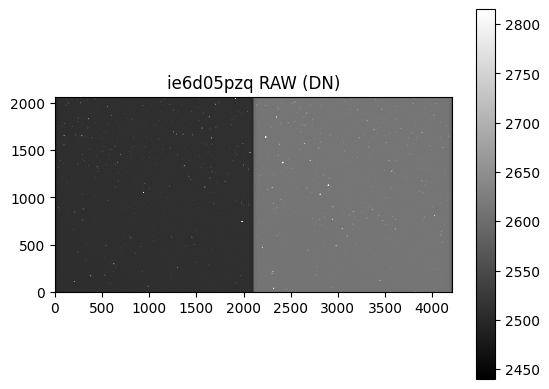

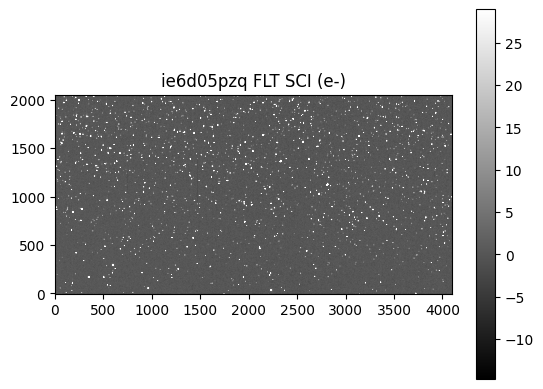

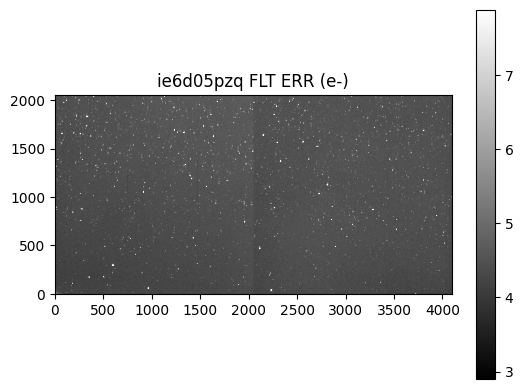

In [34]:
for i in range (3):
    vmin, vmax = zscale(data[i])
    plt.title(f'{obs_id} {subplot_titles[i]}')
    plt.imshow(data[i], vmin=vmin, vmax=vmax, origin='lower', cmap='gray')
    plt.colorbar()
    plt.show()

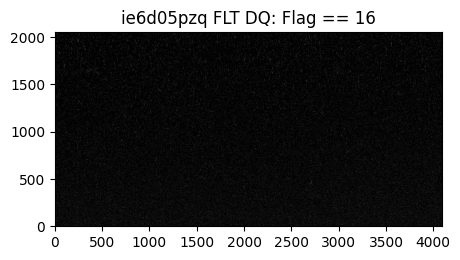

In [35]:
dq_flag = 16
data_dq_one_flag = np.bitwise_and(data_dq, dq_flag)
plt.figure(figsize=[5,5])
plt.title(f'{obs_id} {subplot_titles[3]}: Flag == {dq_flag}')
plt.imshow(data_dq_one_flag, origin='lower', cmap='gray')
plt.tick_params()
plt.show()

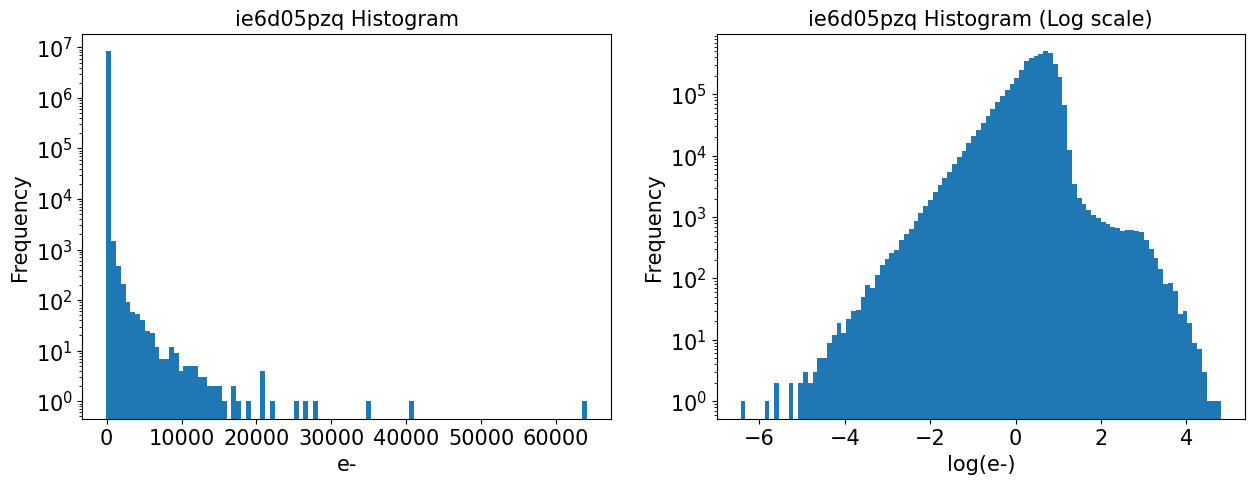

In [36]:
fontsize = 15
fig, axs = plt.subplots(1,2,figsize=[15,5])

axs[0].set_title(f'{obs_id} Histogram', fontsize=fontsize)
axs[0].hist(data_sci.flatten(), bins=100)
axs[0].set_xlabel('e-', fontsize=fontsize)
axs[0].set_ylabel('Frequency', fontsize=fontsize)
axs[0].set_yscale('log')
axs[0].tick_params(labelsize=fontsize)

data_log = np.log10(data_sci[data_sci>0].flatten())
axs[1].set_title(f'{obs_id} Histogram (Log scale)', fontsize=fontsize)
axs[1].hist(data_log, bins=100)
axs[1].set_xlabel('log(e-)', fontsize=fontsize)
axs[1].set_ylabel('Frequency', fontsize=fontsize)
axs[1].set_yscale('log')
axs[1].tick_params(labelsize=fontsize)

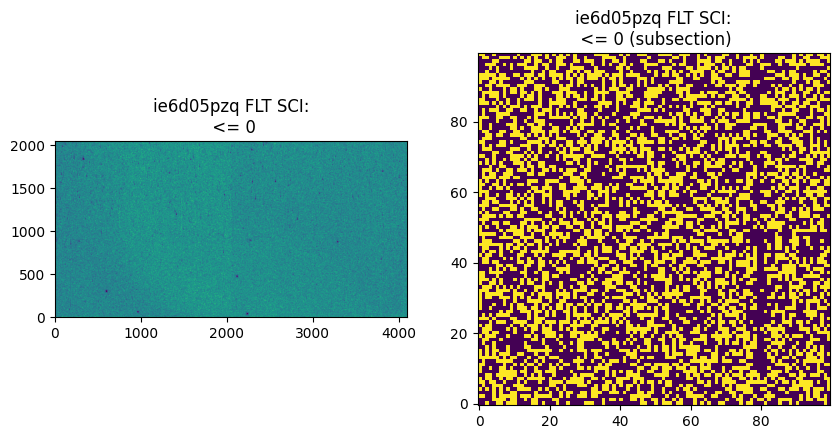

In [37]:
data_sci_lt_0 = data_sci <= 0
fig, axs = plt.subplots(1,2,figsize=[10,5])

axs[0].set_title(f'{obs_id} FLT SCI:\n <= 0')
axs[0].imshow(data_sci_lt_0, origin='lower')

axs[1].set_title(f'{obs_id} FLT SCI:\n <= 0 (subsection)')
axs[1].imshow(data_sci_lt_0[100:200, 100:200], origin='lower')

In [290]:
data_sci_mean = np.mean(data_sci)
data_sci_median = np.median(data_sci)
data_sci_min = np.min(data_sci)
data_sci_max = np.max(data_sci)
data_sci_std = np.std(data_sci)
data_sci_mad = median_abs_deviation(data_sci.flatten())

data_sci_stats = [data_sci_mean, data_sci_median, 
                  data_sci_min, data_sci_max, 
                  data_sci_std, data_sci_mad]

In [291]:
data_sci_stats

[8219.488, 96.44656, -8.020825, 78739.74, 15275.106, 70.25541687011719]